# Aumentacion de Datos
Un problema habitual, es la cantidad de datos de los que se dispone para entrar los modelos, para que estos presenten los resultados esperados es necesario que el entrenamiento ocurra con una gran cantidad de datos (dataset), pero en muchas ocasiones no se dispone de los datos necesario para realizar estas tareas.
Es aquí donde entra la técnica **Data Augmentation** que, como indica su nombre, nos permite aumentar nuestro dataset de dos formas:




*   Introduciendo perturbaciones en los datos originales. Por ejemplo: tomando una imagen original centrada, la replicamos  descentrada, invirtiendo ejes…
*   Utilizando distintas distribuciones. Ej: si queremos entrenar un modelo para clasificar imágenes de alta resolución, añadimos imágenes de baja resolución, con ruido… siempre manteniendo la mayor proporción de alta resolución.



En un primer instante, las redes neuronales no son inteligentes. Por ejemplo, una red neuronal mal entrenada pensaría que estas tres pelotas de tenis que se muestran a continuación son imágenes distintas y únicas.

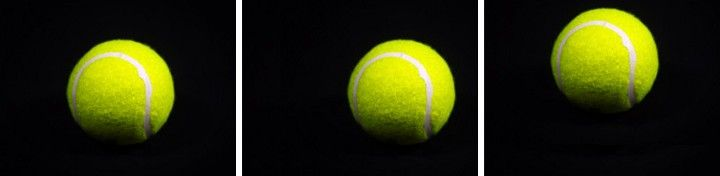



La misma pelota con algunas traslaciones



Entonces si trabajamos con imagenes, solo son necesarias hacer algunas pequeñas alteraciones a nuestro dataset y podremos conseguir nuestro objetivo.
Existen muchas formas de aumentacion de datos con imagenes, tales como:


1.   Dar a vuelta (Flip)
2.   Rotacion

1.   Escala
2.   Recorte

1.   Traslacion
2.   Ruido gaussiano









La biblioteca Keras brinda la capacidad de usar el aumento de datos automáticamente al entrenar un modelo.
Esto se logra mediante el uso de la clase ImageDataGenerator.
Se admiten una variedad de técnicas, así como métodos de escala de píxeles, como:



*   La cambios en la imagen (traslaciones) a través de los argumentos **width_shift_range** y **height_shift_range**.
*  La dar la vuelta a la imagen  mediante los argumentos **horizontal_flip** y **vertical_flip**.
*   Rotaciones de imágenes a través del argumento **rotation_range**
*   Brillo de la imagen mediante el argumento **brightness_range**.
*   Zoom de imagen mediante el argumento **zoom_range**.

Veamos de forma independiente ejemplos de imágenes después de que se hayan aumentado. Es común utilizar una variedad de técnicas de aumento al mismo tiempo durante el entrenamiento.


In [1]:
import matplotlib.pyplot as plt    #Libreria que permite graficar, muy al estilo de MATLAB
import numpy as np                  #Libreria que permite trabajar con arreglo  
from numpy import expand_dims       #Expande la forma del arreglo 
from keras.preprocessing.image import load_img    #De la libreria de Keras para aumentacion de datos, cargamos la imagen en el formato de la libreria de imagenes de python (PIL)
from keras.preprocessing.image import img_to_array #tomará una  imagen (PIL) y la convierte en una matriz. Si parte de una imagen PNG, los valores dentro de la imagen estarán entre 0 y 255.
from keras.preprocessing.image import ImageDataGenerator #clase que toma datos originales, los transforma de forma aleatoria y devuelve solo los datos nuevos transformados
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica


Primero cargamos una imagen de internet


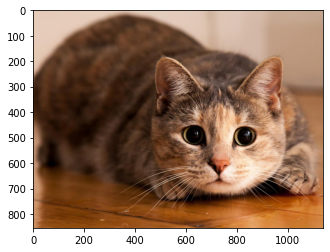

In [2]:
url = 'https://estaticos.muyinteresante.es/media/cache/1140x_thumb/uploads/images/gallery/59c4f5655bafe82c692a7052/gato-marron_0.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


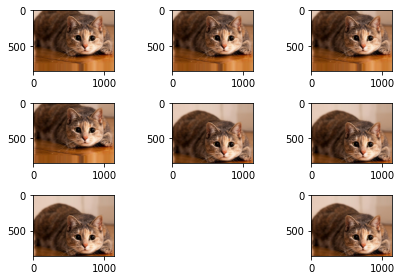

In [3]:
# Convertimos la imagen a un arreglo
data = img_to_array(img)
# realizamos una expansion a una muestra 
samples = expand_dims(data, 0)
# Creamos el aumentador de datos utilizando solo cambio de imgen 
datagen = ImageDataGenerator(height_shift_range=[-100,100])
# preparamos el iterator
it = datagen.flow(samples, batch_size=1)
# generamos muestras y mostramos los resultados
for i in range(9):
	plt.subplot(330 + 1 + i)
	# se generan lotes de imagenes
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
The increase is specified by a Boolean argument **horizontal_flip** o **vertical_flip** for class **ImageDataGenerator**.

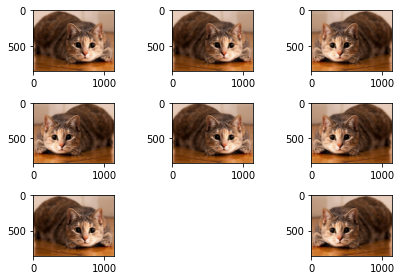

In [4]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower bound, upper bound] = [1-zoom_range, 1 + zoom_range]

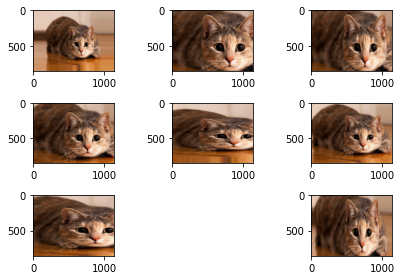

In [5]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

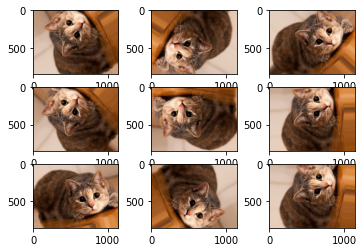

In [6]:
datagen = ImageDataGenerator(rotation_range=180)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.



              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

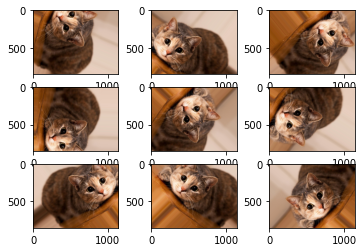

In [7]:
datagen = ImageDataGenerator(
            rotation_range               = 90,
            width_shift_range            = [100,100],   
            height_shift_range           = [100,100],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely.
There are some libraries that can help us to carry out this task, we will start by analyzing the following:


1.   Text Attack
2.   Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.


In [8]:
!pip install textattack

     |████████████████████████████████| 327kB 5.0MB/s 
     |████████████████████████████████| 245kB 19.2MB/s 
     |████████████████████████████████| 1.1MB 25.4MB/s 
     |████████████████████████████████| 102kB 10.9MB/s 
     |████████████████████████████████| 778kB 24.6MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 1.7MB 50.7MB/s 
     |████████████████████████████████| 153kB 51.7MB/s 
     |████████████████████████████████| 235kB 61.8MB/s 
     |████████████████████████████████| 686kB 50.8MB/s 
     |████████████████████████████████| 3.0MB 54.6MB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
     |████████████████████████████████| 317kB 54.4MB/s 
     |████████████████████████████████| 798kB 55.9MB/s 
     |████████████████████████████████| 19.7MB 6.6MB/s 
     |████████████████████████████████| 983kB 54.4MB/s 
     |████████████████████████████████| 1.1MB 53.6MB/s 
     |████████████████████████████████| 71kB 11.5MB

In [9]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-17 02:03:58 INFO: Downloading default packages for language: en (English)...
2020-10-17 02:04:09 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [10]:
text = "Will you look back on life and say, I wish I had, or I’m glad I did?"

TextAttack provides us with four methods for data augmentation


## WordNetAugmenter
Augments the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept. WordNet superficially resembles a thesaurus in that it groups words based on their meaning.



In [11]:
aug = WordNetAugmenter();
aug.augment(text)

['Will you look back on life and say, I wish I had, or I’m gladiolus I did?']


## EmbeddingAugmenter
 Aumenta el texto transformando palabras con sus incrustaciones, con una restricción para garantizar que su similitud de coseno sea de al menos 0,8.


In [12]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:11<00:00, 40.6MB/s]
textattack: Unzipping file /root/.cache/textattack/tmp9nb6bucf.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['Will you look back on life and say, I want I had, or I’m glad I did?']

## CharSwapAugmenter
Augment text by substituting, deleting, inserting, and swapping adjacent characters.

In [13]:
aug = CharSwapAugmenter()
aug.augment(text)

['Will you look back on life and say, I wish I had, or I’m ghlad I did?']


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.

In [14]:
aug = EasyDataAugmenter()
aug.augment(text)

['Will you look back on life and say, I wish I had, or I’ glad I did?',
 'Will you look back on life and say, I wish I had, or I’m glad i I did?',
 'Will you look back on life and say, I wish ace had, or I’m glad I did?',
 'Will you look say on life and back, I wish I had, or I’m glad I did?']

Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the ** translate () ** method are:



1. ** src **: source language. this parameter is optional as ** googletrans ** will detect it.
2. ** dest **: target language. Mandatory parameter.

1. ** text **: the text to be translated from the source language to the target language. Mandatory parameter.






 



When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.

The supported languages can be consulted at https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results, it is recommended to do some tests with the languages, if the target language is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a problem. try and failure.


Examples of languages


*   Afrikáans	'af'

*   Chino (simplificado) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japonés	'ja'
*   Latín	'la'


*   Español	'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [15]:
!pip install googletrans

     |████████████████████████████████| 61kB 3.9MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 972kB 14.4MB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
     |████████████████████████████████| 102kB 15.4MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=ec8e1dc373f2af4abe28b7e90ed3a73a5bb8daa89923147d79dac8e9d7c2371e
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=f4918e8a2d813755923aa978d98036f2fad3de31da467f4f4ef41847f66848c4
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [16]:
from googletrans import Translator
translator = Translator()

In [17]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Uma ekuqaleni ungaphumeleli, zama, uzame futhi.
If at first you fail, try again.
